## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

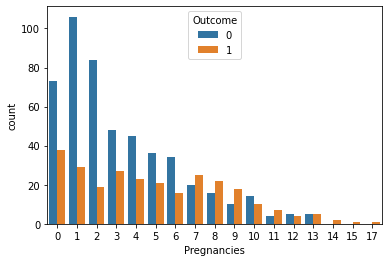

In [4]:
sns.countplot(data = df, x='Pregnancies', hue='Outcome')
plt.show()

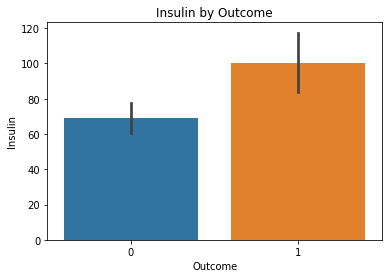

In [5]:
plt.title('Insulin by Outcome')
sns.barplot(data=df, x='Outcome',y='Insulin')
plt.show()

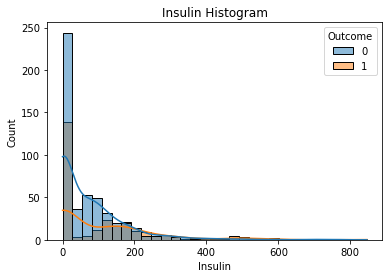

In [6]:
plt.title('Insulin Histogram')
sns.histplot(data=df, x='Insulin', hue='Outcome', kde=True)
plt.show()

## Feature Engineering
### 수치형 변수를 범주형 변수로 만들기

In [7]:
# Pregnancies_high 파생변수 만들기
# 임신횟수가 6보다 큰 값의 True, False 값을 파생변수로 만들기

df["Pregnancies_high"] = df['Pregnancies'] > 6
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


### 결측치 다루기

In [8]:
# Insulin의 0 값을 결측치로 만들어 Insulin_nan 이라는 새로운 컬럼을 만들기
df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0


In [9]:
# 결측치 수
print('Insulin nan :',df['Insulin_nan'].isna().sum())

Insulin nan : 374


In [10]:
# 결측치 비율
print('Insulin nan :',np.round(df['Insulin_nan'].isna().mean(),2))

Insulin nan : 0.49


In [11]:
# groupby 로 당뇨병 여부에 따라 평균, 중앙값 구하기
in_desc = df.groupby('Outcome')['Insulin'].describe()
in_desc

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


In [12]:
# 결측치 채우기
df['Insulin_filled'] = df['Insulin_nan']
df.loc[df['Insulin_nan'].isna() & (df['Outcome'] == 0) , 'Insulin_filled'] = in_desc.loc[0,'50%']
df.loc[df['Insulin_nan'].isna() & (df['Outcome'] == 1) , 'Insulin_filled'] = in_desc.loc[1,'50%']
df['Insulin_filled'].isna().sum()

0

### 이상치(outlier) 다루기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin_filled'>

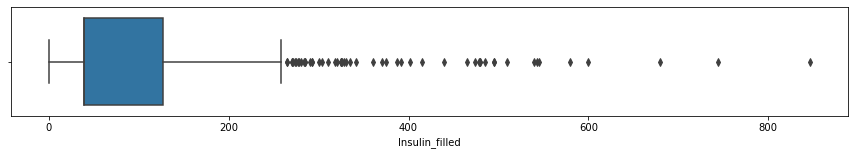

In [13]:
plt.figure(figsize=(15, 2))
sns.boxplot(df["Insulin_filled"])

In [14]:
df["Insulin_filled"].describe()

count    768.000000
mean      91.783854
std      108.121136
min        0.000000
25%       39.000000
50%       39.000000
75%      127.250000
max      846.000000
Name: Insulin_filled, dtype: float64

In [15]:
# 이상치 찾기
iqr3 = np.quantile(df['Insulin_filled'],0.75)
print('iqr3 :',iqr3)
df.loc[df['Insulin_filled'] > iqr3,'Insulin_filled'] = iqr3
df.head()

iqr3 : 127.25


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_filled
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN,0.00
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN,39.00
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN,0.00
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0,94.00
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0,127.25


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin_filled'>

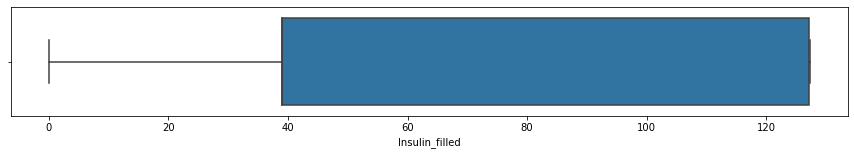

In [16]:
plt.figure(figsize=(15, 2))
sns.boxplot(df["Insulin_filled"])

## 학습, 예측 데이터셋 나누기

In [17]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [18]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count]
print('train.shape :',train.shape)
train.head()

train.shape : (614, 12)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_filled
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN,0.00
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN,39.00
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN,0.00
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0,94.00
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0,127.25


In [19]:
test = df[split_count:]
print('test.shape :',test.shape)
test.head()

test.shape : (154, 12)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_filled
614,11,138,74,26,144,36.1,0.557,50,1,True,144.0,127.25
615,3,106,72,0,0,25.8,0.207,27,0,False,NaN,39.00
616,6,117,96,0,0,28.7,0.157,30,0,False,NaN,39.00
617,2,68,62,13,15,20.1,0.257,23,0,False,15.0,15.00
618,9,112,82,24,0,28.2,1.282,50,1,True,NaN,0.00


## 정답값이자 예측해야 될 값

In [20]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = 'Outcome'
label_name

'Outcome'

## 학습, 예측에 사용할 컬럼

In [21]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = df.columns.difference(['Outcome','Pregnancies','Insulin','Insulin_nan'])
feature_names

Index(['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose',
       'Insulin_filled', 'Pregnancies_high', 'SkinThickness'],
      dtype='object')

## 학습, 예측 데이터셋 만들기

In [22]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
print('X_train.shape :',X_train.shape)
X_train.head()

X_train.shape : (614, 8)


,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin_filled,Pregnancies_high,SkinThickness
0,50,33.6,72,0.627,148,0.00,False,35
1,31,26.6,66,0.351,85,39.00,False,29
2,32,23.3,64,0.672,183,0.00,True,0
3,21,28.1,66,0.167,89,94.00,False,23
4,33,43.1,40,2.288,137,127.25,False,35


In [23]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
print('y_train.shape :',y_train.shape)
y_train.head()

y_train.shape : (614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [24]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
print('X_test.shape :',X_test.shape)
X_test.head()

X_test.shape : (154, 8)


,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin_filled,Pregnancies_high,SkinThickness
614,50,36.1,74,0.557,138,127.25,True,26
615,27,25.8,72,0.207,106,39.00,False,0
616,30,28.7,96,0.157,117,39.00,False,0
617,23,20.1,62,0.257,68,15.00,False,13
618,50,28.2,82,1.282,112,0.00,True,24


In [25]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
print('y_test.shape :',y_test.shape)
y_test.head()

y_test.shape : (154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=8, min_samples_leaf = 20, random_state=42, criterion='gini')
model

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [27]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=42)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [28]:
y_predict = model.predict(X_test)

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

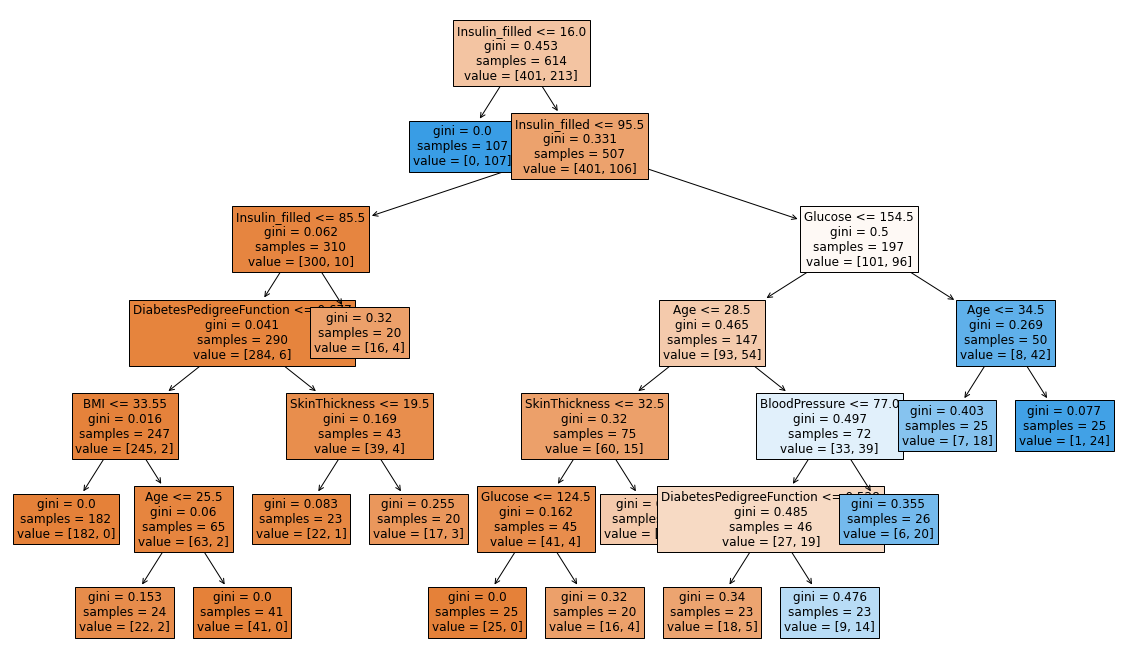

In [29]:
# plot_tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12))
plot_tree(model, filled=True, feature_names = feature_names, fontsize=12)
plt.show()

In [30]:
# 피처의 중요도를 추출하기
model.feature_importances_

array([5.09322892e-02, 4.51653156e-04, 2.09913081e-02, 2.01703336e-02,
       8.74483160e-02, 8.04962916e-01, 0.00000000e+00, 1.50431838e-02])

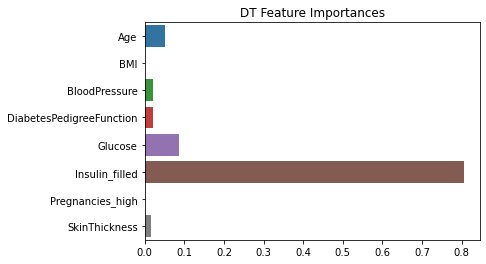

In [31]:
# 피처의 중요도 시각화 하기
plt.title('DT Feature Importances')
sns.barplot(x = model.feature_importances_, y = feature_names)
plt.show()

## 정확도(Accuracy) 측정하기

In [32]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.
print('ACC :',np.round((y_test == y_predict).mean(),4))

ACC : 0.8961


In [34]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score
print('ACC :',np.round(accuracy_score(y_test,y_predict),4))

ACC : 0.8961


## GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
param_grid = {
    'max_depth' : np.arange(3,20),
    'min_samples_leaf': np.arange(10,100,10),
    'max_leaf_nodes' : np.arange(10,100,10)
}

best = GridSearchCV(model, param_grid = param_grid, cv=5, refit=True)

best.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'max_leaf_nodes': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'min_samples_leaf': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [41]:
best_param = best.best_params_
best_param

{'max_depth': 8, 'max_leaf_nodes': 10, 'min_samples_leaf': 10}

In [42]:
best_est = best.best_estimator_
best_pred = best_est.predict(X_test)
print('ACC :',np.round(accuracy_score(best_pred,y_test),4))

ACC : 0.8766
